In [ ]:
import numpy as np
import scipy as scipy

In [ ]:
def initial_matrix(N: int, phi_1: float, phi_2: float, theta_1: float, theta_2: float):
    # the initial rectangle area on the spherical coordinte is pi * 2pi
    output = np.zeros((N, 2*N))
    # phi and theta should in pi * 2pi
    if(phi_1 > 2*np.pi or phi_2 > 2*np.pi or theta_1 > np.pi or theta_2 > np.pi):
        raise ValueError("out of bound")
        
    if(phi_1 > phi_2):
        raise ValueError("phi_1 should be smaller than phi_2") 
    if(theta_1 > theta_2):
        raise ValueError("theta_1 should be smaller than theta_2")  
        
    a_1 = int(N * theta_1 / np.pi)
    a_2 = int(N * theta_2 / np.pi)
    b_1 = int(N * phi_1 / (2 * np.pi))
    b_2 = int(N * phi_2 / (2 * np.pi))
    
    output[a_1:a_2, b_1:b_2] = 1
    
    return output

In [ ]:
import pyshtools as pyshtools


In [29]:
agrid = initial_matrix(50, 1, 2, 1, 2)

In [30]:
grid = pyshtools.SHGrid.from_array(agrid)

In [31]:
clm = grid.expand()

In [32]:
# grid_reco = clm.expand(lmax=lmax)

In [33]:
from pyshtools.shtools import SHExpandDH, MakeGridDH

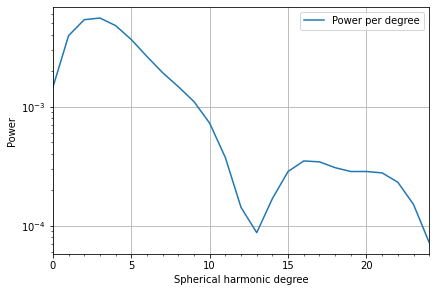

In [34]:
fig, ax = clm.plot_spectrum(show=False) 

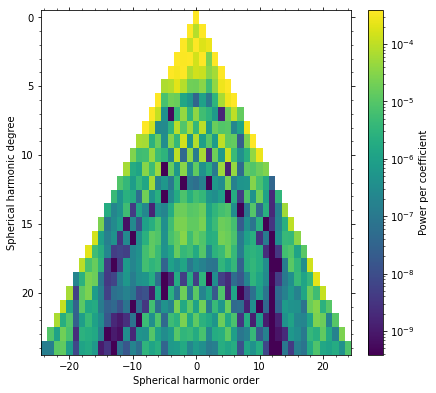

In [35]:
fig, ax = clm.plot_spectrum2d(cmap_rlimits=(1.e-7, 0.1),
                              show=False)

In [44]:
coeffs = clm.to_array(lmax=90)
print(coeffs, end='\n\n')
print('c20 = {:f}'.format(coeffs[0,2,0]))

[[[ 0.03807206  0.          0.         ...  0.          0.
    0.        ]
  [ 0.00907056  0.0489964   0.         ...  0.          0.
    0.        ]
  [-0.03054111  0.01376661  0.01592831 ...  0.          0.
    0.        ]
  ...
  [ 0.          0.          0.         ...  0.          0.
    0.        ]
  [ 0.          0.          0.         ...  0.          0.
    0.        ]
  [ 0.          0.          0.         ...  0.          0.
    0.        ]]

 [[ 0.          0.          0.         ...  0.          0.
    0.        ]
  [ 0.          0.03800551  0.         ...  0.          0.
    0.        ]
  [ 0.          0.01067848  0.06203668 ...  0.          0.
    0.        ]
  ...
  [ 0.          0.          0.         ...  0.          0.
    0.        ]
  [ 0.          0.          0.         ...  0.          0.
    0.        ]
  [ 0.          0.          0.         ...  0.          0.
    0.        ]]]

c20 = -0.030541


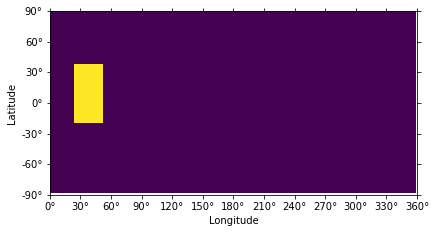

In [37]:
fig, ax = grid.plot(show=False)

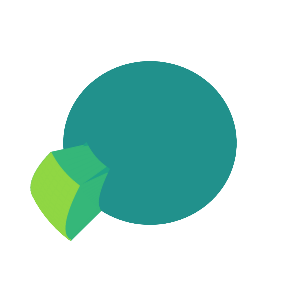

In [40]:
fig, ax = grid.plot3d(elevation=60,
                      azimuth=90,
                      scale=2,
                      cmap_limits=[-1.5, 1.5],
                      show=False)